# Machine Learning Mastery in Python
Based on ebook by [Jason Brownlee](http://machinelearningmastery.com). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

## Descriptive stats

In [2]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima = pd.read_csv('pima-indians-diabetes.data.csv', names=names)
pima['class_text'] = pima['class'].map({0: 'healthy', 1: 'diabetes'})
pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class,class_text
0,6,148,72,35,0,33.6,0.627,50,1,diabetes
1,1,85,66,29,0,26.6,0.351,31,0,healthy
2,8,183,64,0,0,23.3,0.672,32,1,diabetes
3,1,89,66,23,94,28.1,0.167,21,0,healthy
4,0,137,40,35,168,43.1,2.288,33,1,diabetes


In [3]:
print('pima shape: ', pima.shape)
print('\ndtypes: \n', pima.dtypes)

pima shape:  (768, 10)

dtypes: 
 preg            int64
plas            int64
pres            int64
skin            int64
test            int64
mass          float64
pedi          float64
age             int64
class           int64
class_text     object
dtype: object


In [4]:
pd.set_option('precision', 2)
pima_vars = pima.iloc[:,:-2]
pima_vars.describe()

,preg,plas,pres,skin,test,mass,pedi,age
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00


In [5]:
pima.groupby('class_text').size()

class_text
diabetes    268
healthy     500
dtype: int64

In [6]:
# correlations
pima_vars.corr() # Pearson is default method

,preg,plas,pres,skin,test,mass,pedi,age
preg,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54
plas,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26
pres,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24
skin,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11
test,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04
mass,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04
pedi,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03
age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00


In [7]:
# The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.
pima_vars.skew()

preg    0.90
plas    0.17
pres   -1.84
skin    0.11
test    2.27
mass   -0.43
pedi    1.92
age     1.13
dtype: float64

## Visualization

### Univariate

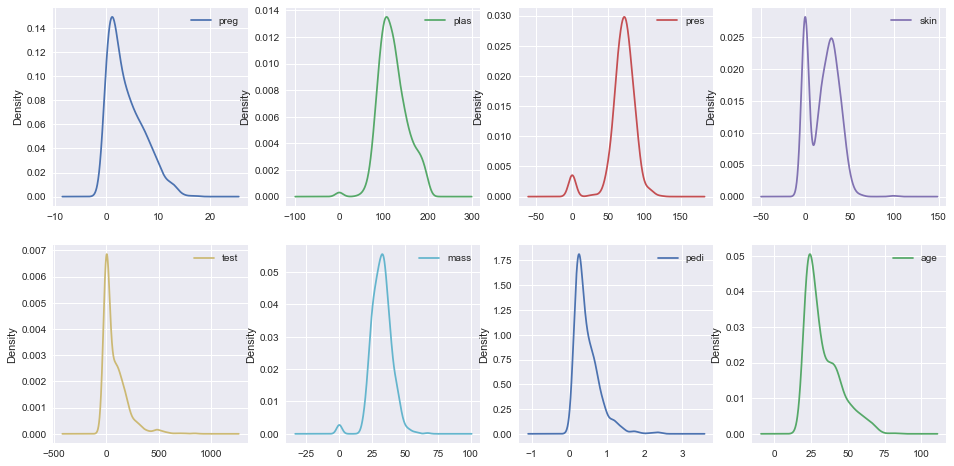

In [8]:
params = {'subplots': True, 'layout': (2,4), 'sharex': False, 'figsize': (16,8)}
pima_vars.plot(kind='density', **params)
# pima_vars.plot(kind='box', sharey = False, **params)
plt.show() # prevents text code above plot in notebook

### Multivariate

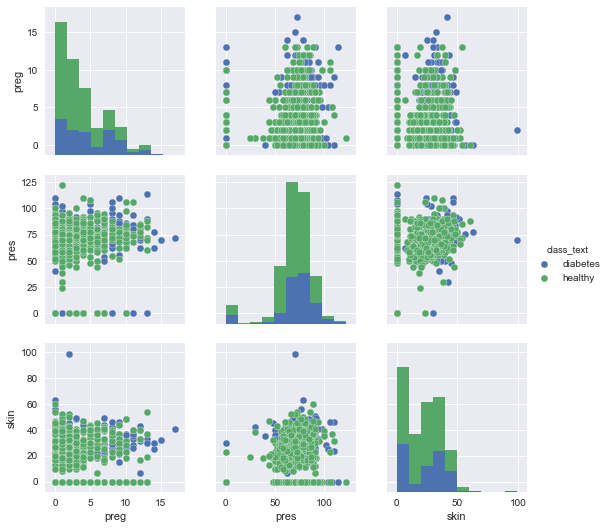

In [9]:
sns.pairplot(pima[['preg', 'pres', 'skin', 'class_text']], hue='class_text')

# plt.figure(figsize=(12,10))
# sns.heatmap(pima.corr())
# plt.savefig('pima_corr.png', dpi=300)
plt.show()

## Data preprocessing

In [10]:
# create X and y for examples
X = pima.values[:,:8].astype('float64')
y = pima.values[:,8].astype('int')

### Rescale 
data between 0 and 1

In [11]:
from sklearn.preprocessing import MinMaxScaler
X_rescaled = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_rescaled[:3,:]

array([[ 0.35294118,  0.74371859,  0.59016393,  0.35353535,  0.        ,
         0.50074516,  0.23441503,  0.48333333],
       [ 0.05882353,  0.42713568,  0.54098361,  0.29292929,  0.        ,
         0.39642325,  0.11656704,  0.16666667],
       [ 0.47058824,  0.91959799,  0.52459016,  0.        ,  0.        ,
         0.34724292,  0.25362938,  0.18333333]])

### Standardize 
to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1

In [12]:
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)
X_standardized[:3,:]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

### Normalize 
Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1 in linear algebra).

In [13]:
from sklearn.preprocessing import Normalizer
X_normalized = Normalizer().fit_transform(X)
X_normalized[:3,:]

array([[ 0.03355237,  0.82762513,  0.40262844,  0.19572216,  0.        ,
         0.18789327,  0.00350622,  0.27960308],
       [ 0.008424  ,  0.71604034,  0.55598426,  0.24429612,  0.        ,
         0.22407851,  0.00295683,  0.26114412],
       [ 0.04039768,  0.92409698,  0.32318146,  0.        ,  0.        ,
         0.11765825,  0.00339341,  0.16159073]])

### Binarize
Make binary, based on threshold (round to 0 or 1)

In [14]:
from sklearn.preprocessing import Binarizer
X_binarized = Binarizer(threshold=0.0).fit_transform(X)
X_binarized[:3,:]

array([[ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.]])

## Feature selection

### Univariate
Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the SelectKBest class2 that can be used with a suite of different statistical tests to select a specific number of features. The example below uses the chi-squared (chi2) statistical test for non-negative features to select 4 of the best features from the Pima Indians onset of diabetes dataset.

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fit = SelectKBest(score_func=chi2, k=4).fit(X,y)
print('Fitting scores (chi2):\n', fit.scores_)

# Highest scores are for plas, test, mass and age
X_kbest = fit.transform(X)
print('\nFirst rows for kbest features:\n', X_kbest[:3,:])

Fitting scores (chi2):
 [  111.51969064  1411.88704064    17.60537322    53.10803984  2175.56527292
   127.66934333     5.39268155   181.30368904]

First rows for kbest features:
 [[ 148.     0.    33.6   50. ]
 [  85.     0.    26.6   31. ]
 [ 183.     0.    23.3   32. ]]


### Recursive Feature Elimination (RFE)

In [16]:
# Example with logistic regression, could be something else
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe = RFE(LogisticRegression(), n_features_to_select=3)
fit = rfe.fit(X,y)

print('Num features: ', fit.n_features_)
print('Selected features: ', fit.support_)
print('Feature ranking: ', fit.ranking_) # selected features are ranked as 1

Num features:  3
Selected features:  [ True False False False False  True  True False]
Feature ranking:  [1 2 3 5 6 1 1 4]


### Principal Component Analysis (PCA)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
fit = pca.fit(X) # needs only input variables... unsupervised!

print('Explained variance ratio: ', fit.explained_variance_ratio_)
print('Components: \n', fit.components_)

Explained variance ratio:  [ 0.88854663  0.06159078  0.02579012]
Components: 
 [[ -2.02176587e-03   9.78115765e-02   1.60930503e-02   6.07566861e-02
    9.93110844e-01   1.40108085e-02   5.37167919e-04  -3.56474430e-03]
 [ -2.26488861e-02  -9.72210040e-01  -1.41909330e-01   5.78614699e-02
    9.46266913e-02  -4.69729766e-02  -8.16804621e-04  -1.40168181e-01]
 [ -2.24649003e-02   1.43428710e-01  -9.22467192e-01  -3.07013055e-01
    2.09773019e-02  -1.32444542e-01  -6.39983017e-04  -1.25454310e-01]]


### Feature Importance

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print('Feature importance:\n', model.feature_importances_) 
# The scores suggest at the importance of plas, age and mass.

Feature importance:
 [ 0.11183388  0.24974848  0.10198037  0.07338403  0.0702878   0.13537119
  0.10880812  0.14858614]


## Performance evaluation with resampling

### Split into Train and Test Sets

In [19]:
# example with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(result*100))

Accuracy: 78.79%


### K-fold Cross-Validation

In [20]:
# example with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
results = cross_val_score(LogisticRegression(), X, y, cv=KFold(10))
print('Accuracy (std): {:.2f}% ({:.2f}%)'.format(results.mean() * 100, results.std()*100))

Accuracy (std): 76.95% (4.84%)


### Leave One Out Cross-Validation

In [21]:
# example with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score
results = cross_val_score(LogisticRegression(), X, y, cv=LeaveOneOut())
print('Accuracy (std): {:.2f}% ({:.2f}%)'.format(results.mean() * 100, results.std()*100)) # high variance !!

Accuracy (std): 76.82% (42.20%)


### Repeated Random Test-Train Splits

In [22]:
# example with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit, cross_val_score
results = cross_val_score(LogisticRegression(), X, y, cv=ShuffleSplit(10, test_size=0.3))
print('Accuracy (std): {:.2f}% ({:.2f}%)'.format(results.mean() * 100, results.std()*100))

Accuracy (std): 76.84% (1.95%)


## Performance metrics

### Classification metrics

In [23]:
# create variables for next examples with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
model = LogisticRegression()
kfold = KFold(10)

**Accuracy**

Classification accuracy is the number of correct predictions made as a ratio of all predictions made. This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

In [24]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

**Logarithmic Loss**

Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction. 

In [25]:
from sklearn.model_selection import cross_val_score
neg_log_loss = cross_val_score(model, X, y, cv=kfold, scoring='neg_log_loss')

**Area Under ROC Curve (AUC)**

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems. The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random. ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.

* Sensitivity is the true positive rate also called the recall. It is the number of instances from the positive (first) class that actually predicted correctly.
* Specificity is also called the true negative rate. Is the number of instances from the negative (second) class that were actually predicted correctly.

In [26]:
from sklearn.model_selection import cross_val_score
roc_auc = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

**Confusion matrix**

The confusion matrix is a handy presentation of the accuracy of a model with two or more classes. The table presents predictions on the x-axis and accuracy outcomes on the y-axis.

In [27]:
from sklearn.metrics import confusion_matrix
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[138  18]
 [ 31  44]]


**Classification report**

The scikit-learn library provides a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures. The `classification_report()` function displays the precision, recall, F1-score and support for each class.

In [28]:
from sklearn.metrics import classification_report
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85       156
          1       0.71      0.59      0.64        75

avg / total       0.78      0.79      0.78       231



### Regression metrics

In [29]:
# load regression dataset
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
houses = pd.read_csv('housing.csv', names=names, delim_whitespace=True)
houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33,36.2


In [30]:
# create variables for regression
Xr = houses.values[:,:13]
yr = houses.values[:,13]

**Mean Absolute Error**

The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).

In [31]:
# example with linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
results = cross_val_score(LinearRegression(), Xr, yr, cv=KFold(10), scoring = 'neg_mean_absolute_error')
print('MAE (std): {:.2f} ({:.2f})'.format(results.mean(), results.std()))

MAE (std): -4.00 (2.08)


**Mean squared error**

The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error. Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).

In [32]:
# example with linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
results = cross_val_score(LinearRegression(), Xr, yr, cv=KFold(10), scoring = 'neg_mean_squared_error')
print('MSE (std): {:.2f} ({:.2f})'.format(results.mean(), results.std()))

MSE (std): -34.71 (45.57)


**R<sup>2</sup>**

The R<sup>2</sup> (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature this measure is called the coefficient of determination. This is a value between 0 and 1 for no-fit and perfect fit respectively.

In [33]:
# example with linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
results = cross_val_score(LinearRegression(), Xr, yr, cv=KFold(10), scoring = 'r2')
print('R^2 (std): {:.2f} ({:.2f})'.format(results.mean(), results.std()))

R^2 (std): 0.20 (0.60)


## Spot check classification and regression algorithms

Use `KFold` and `cross_val_score` from examples above. Example below shows integrated approach in standalone example.

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.700444 (0.074015)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


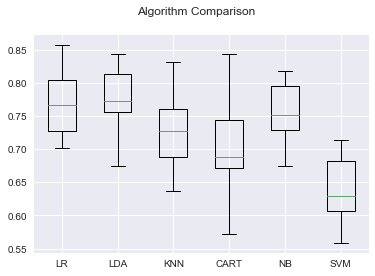

In [34]:
# imports
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# load dataset
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values # get only values instead of full dataframe !!
X = array[:,0:8]
Y = array[:,8]

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Pipelines and feature selection

An easy trap to fall into in applied machine learning is leaking data from your training dataset to your test dataset. To avoid this trap you need a robust test harness with strong separation of training and testing. This includes data preparation. Data preparation is one easy way to leak knowledge of the whole training dataset to the algorithm. For example, preparing your data using normalization or standardization on the entire training dataset before learning would not be a valid test because the training dataset would have been influenced by the scale of the data in the test set.

Pipelines help you prevent data leakage in your test harness by ensuring that data preparation like standardization is constrained **to each fold of your cross-validation procedure**.

Feature extraction is another procedure that is susceptible to data leakage. Like data preparation, feature extraction procedures must be restricted to the data in your training dataset. The pipeline provides a handy tool called the `FeatureUnion` which allows the results of multiple feature selection and extraction procedures to be combined into a larger dataset on which a model can be trained. Importantly, all the feature extraction and the feature union occurs **within each fold of the cross-validation procedure**.

In [35]:
# uses example data from above

# imports
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.776042378674


## Improve Performance with Ensembles

The three most popular methods for combining the predictions from different models are:
  
* **Bagging**. Building multiple models (typically of the same type) from different subsamples of the training dataset.
  
* **Boosting**. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the sequence of models.
  
* **Voting**. Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

### Bagging
Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset (with replacement) and training a model for each sample. The final output prediction is averaged across the predictions of all of the submodels.

#### Bagged decision tree

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=50) 
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.752511961722


#### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, max_features=3) 
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.766831852358


### Boosting
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence. Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

#### AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=30)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.76045796309


#### Stochastic Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=50) 
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.772043745728


### Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.738209159262


## Hyperparameter tuning

### Grid search

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print('Grid best score:', grid.best_score_)
print('Grid best estimator:', grid.best_estimator_.alpha)

Grid best score: 0.279617559313
Grid best estimator: 1.0


### Random search

In [42]:
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X, Y)
print('Random search best score:', rsearch.best_score_)
print('Random search best model:', rsearch.best_estimator_.alpha)

Random search best score: 0.279617337555
Random search best model: 0.988684304696
